In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

from glob import glob

In [3]:
jumposu = pd.read_csv("data/서울시_우리마을가게_상권분석서비스(신_상권_점포)_2021년.csv", encoding="cp949")
display(jumposu.shape, jumposu.head())

(299164, 15)

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,2021,1,A,골목상권,2110001,이북5도청사,CS100001,한식음식점,10,11,0,0,0,0,1
1,2021,1,A,골목상권,2110001,이북5도청사,CS100008,분식전문점,3,3,0,0,0,0,0
2,2021,1,A,골목상권,2110001,이북5도청사,CS100009,호프-간이주점,1,2,0,0,0,0,1
3,2021,1,A,골목상권,2110001,이북5도청사,CS100010,커피-음료,2,2,0,0,0,0,0
4,2021,1,A,골목상권,2110001,이북5도청사,CS200001,일반교습학원,3,3,0,0,0,0,0


In [4]:
move_pop = pd.read_csv("data/서울시 우리마을가게 상권분석서비스(상권-생활인구).csv", encoding="cp949")
move_pop.head()

,기준 년코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_생활인구_수,남성_생활인구_수,여성_생활인구_수,연령대_10_생활인구_수,...,여성연령대_60_이상_토요일시간대_3_생활인구_수,여성연령대_60_이상_토요일시간대_4_생활인구_수,여성연령대_60_이상_토요일시간대_5_생활인구_수,여성연령대_60_이상_토요일시간대_6_생활인구_수,여성연령대_60_이상_일요일시간대_1_생활인구_수,여성연령대_60_이상_일요일시간대_2_생활인구_수,여성연령대_60_이상_일요일시간대_3_생활인구_수,여성연령대_60_이상_일요일시간대_4_생활인구_수,여성연령대_60_이상_일요일시간대_5_생활인구_수,여성연령대_60_이상_일요일시간대_6_생활인구_수
0,2022,2,U,관광특구,1001496,강남 마이스 관광특구,106859,53586,53273,7510,...,185,181,154,43,55,112,163,152,121,38
1,2022,2,U,관광특구,1001495,잠실 관광특구,3561819,1712126,1849694,387394,...,6862,6916,8368,4345,6891,7064,6357,6340,7521,4070
2,2022,2,U,관광특구,1001494,종로?청계 관광특구,4041501,2175790,1865710,144719,...,13824,13294,10392,4064,5373,7463,9009,8971,7674,4213
3,2022,2,U,관광특구,1001493,동대문패션타운 관광특구,3242889,1525455,1717434,162824,...,7299,6524,5250,2991,5239,5848,5540,4975,5922,5197
4,2022,2,U,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,4382710,2227935,2154774,168316,...,15519,14105,6998,1864,2787,5780,7813,7099,4870,1918


In [73]:
live_pop = pd.read_csv("data/서울시 우리마을가게 상권분석서비스(상권-상주인구).csv", encoding="cp949")
live_pop.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권 코드,총 상주인구 수,남성 상주인구 수,여성 상주인구 수,연령대 10 상주인구 수,연령대 20 상주인구 수,연령대 30 상주인구 수,연령대 40 상주인구 수,연령대 50 상주인구 수,연령대 60 이상 상주인구 수,남성연령대 10 상주인구 수,남성연령대 20 상주인구 수,남성연령대 30 상주인구 수,남성연령대 40 상주인구 수,남성연령대 50 상주인구 수,남성연령대 60 이상 상주인구 수,여성연령대 10 상주인구 수,여성연령대 20 상주인구 수,여성연령대 30 상주인구 수,여성연령대 40 상주인구 수,여성연령대 50 상주인구 수,여성연령대 60 이상 상주인구 수,총 가구 수,아파트 가구 수,비 아파트 가구 수,상권 코드 명
0,2022,2,U,관광특구,1001496,29,16,13,2,4,2,4,9,8,0,2,1,2,5,6,2,2,1,2,4,2,18,0,18,강남 마이스 관광특구
1,2022,2,U,관광특구,1001495,9639,4250,5389,819,2254,2576,1299,1081,1610,424,819,1122,571,533,781,395,1435,1454,728,548,829,6122,0,6122,잠실 관광특구
2,2022,2,U,관광특구,1001494,1977,1303,674,45,218,224,227,425,838,25,138,157,160,300,523,20,80,67,67,125,315,1591,0,1591,종로?청계 관광특구
3,2022,2,U,관광특구,1001493,2703,1294,1409,189,626,630,365,387,506,87,255,301,187,199,265,102,371,329,178,188,241,1753,0,1753,동대문패션타운 관광특구
4,2022,2,U,관광특구,1001492,1089,403,686,17,50,107,175,233,507,7,25,56,66,90,159,10,25,51,109,143,348,494,0,494,명동 남대문 북창동 다동 무교동 관광특구


In [7]:
pd.options.display.max_columns = None

In [9]:
move_pop.columns

Index(['기준 년코드', '기준_분기_코드', '상권_구분_코드', ' 상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '총_생활인구_수', '남성_생활인구_수', '여성_생활인구_수', '연령대_10_생활인구_수',
       ...
       '여성연령대_60_이상_토요일시간대_3_생활인구_수', '여성연령대_60_이상_토요일시간대_4_생활인구_수',
       '여성연령대_60_이상_토요일시간대_5_생활인구_수', '여성연령대_60_이상_토요일시간대_6_생활인구_수',
       '여성연령대_60_이상_일요일시간대_1_생활인구_수', '여성연령대_60_이상_일요일시간대_2_생활인구_수',
       '여성연령대_60_이상_일요일시간대_3_생활인구_수', '여성연령대_60_이상_일요일시간대_4_생활인구_수',
       '여성연령대_60_이상_일요일시간대_5_생활인구_수', '여성연령대_60_이상_일요일시간대_6_생활인구_수'],
      dtype='object', length=532)

In [11]:
move_pop = move_pop[move_pop["기준 년코드"]==2021]

In [12]:
move_pop.shape

(6672, 532)

In [13]:
df_code = pd.read_csv('data/상권_지역_매칭.csv', encoding="utf-8")
df_code.shape

(130968, 12)

In [86]:
move_pop_m = pd.merge(move_pop, df_code, on=['상권_코드'], how='left')
move_pop_m = move_pop_m.drop_duplicates()
print(move_pop_m.shape)

(6672, 543)


In [78]:
live_pop = live_pop.rename(columns = {'상권 코드':'상권_코드'})

In [87]:
live_pop_m = pd.merge(live_pop, df_code, on=['상권_코드'], how='left')
live_pop_m = live_pop_m.drop_duplicates()
print(live_pop_m.shape)

(35916, 41)


In [91]:
move_pop_m[move_pop_m['시군구명'] == '용산구']['총_생활인구_수'].sum()

137903912

In [92]:
move_pop_m[move_pop_m['시군구명'] == '마포구']['총_생활인구_수'].sum()

236538403

In [93]:
live_pop_m[live_pop_m['시군구명'] == '용산구']['총 상주인구 수'].sum()

2727953

In [94]:
live_pop_m[live_pop_m['시군구명'] == '마포구']['총 상주인구 수'].sum()

3565461

In [20]:
# 용산구 흡연구역 : yongsan cigarette place
yongsan_cp = pd.read_csv('data/서울특별시 용산구_흡연구역_20230316.csv', encoding='cp949')
display(yongsan_cp.shape, yongsan_cp)

(72, 7)

,자치구명,시설 구분,시설형태,서울특별시 용산구 설치 위치,설치 주체,위도,경도
0,용산구,철도역,개방형,서울특별시 용산구 서울역 광장 15번출구,한국철도공사,37.553149,126.968881
1,용산구,철도역,개방형,서울특별시 용산구 서울역 광장 1번출구,한국철도공사,37.553760,126.969662
2,용산구,철도역(조례),개방형,서울특별시 용산구 용산역 광장,현대아이파크몰,37.528404,126.965569
3,용산구,청사,개방형,서울특별시 용산구 용산구청 옥상,용산구청,37.532709,126.990000
4,용산구,청사,개방형,서울특별시 용산구 용산구청 2층 외부,용산구청,37.532709,126.990000
...,...,...,...,...,...,...,...
67,용산구,연면적 1000㎡ 이상 대형건물,폐쇄형,서울특별시 용산구 용산더프라임 업무동 지하 1층,용산더프라임,37.540259,126.969626
68,용산구,대학교,개방형,서울특별시 용산구 한국폴리텍대학 정수캠퍼스,한국폴리텍대학,37.529136,126.996483
69,용산구,대학교,개방형,서울특별시 용산구 한국폴리텍대학 정수캠퍼스,한국폴리텍대학,37.528710,126.996226
70,용산구,대학교,개방형,서울특별시 용산구 한국폴리텍대학 정수캠퍼스,한국폴리텍대학,37.529323,126.995976


In [28]:
yongsan_cp_m = yongsan_cp.drop(columns = ["설치 주체", "위도", "경도"])

In [30]:
yongsan_cp_m.columns = ["시군구명", "시설 구분", "시설형태", "주소"]

In [97]:
mapo_cp = pd.read_csv("data/서울특별시 마포구_흡연시설 현황_20220418.csv", encoding='cp949', error_bad_lines=False)
display(mapo_cp.shape, mapo_cp.head())

C:\Users\User\AppData\Local\Temp\ipykernel_13512\2689551292.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  mapo_cp = pd.read_csv("data/서울특별시 마포구_흡연시설 현황_20220418.csv", encoding='cp949', error_bad_lines=False)
b'Skipping line 3: expected 9 fields, saw 10\nSkipping line 4: expected 9 fields, saw 10\nSkipping line 5: expected 9 fields, saw 11\nSkipping line 8: expected 9 fields, saw 10\nSkipping line 9: expected 9 fields, saw 10\nSkipping line 10: expected 9 fields, saw 10\nSkipping line 11: expected 9 fields, saw 10\nSkipping line 12: expected 9 fields, saw 10\nSkipping line 13: expected 9 fields, saw 10\nSkipping line 14: expected 9 fields, saw 10\nSkipping line 16: expected 9 fields, saw 10\nSkipping line 17: expected 9 fields, saw 10\nSkipping line 19: expected 9 fields, saw 10\nSkipping line 20: expected 9 fields, saw 10\nSkipping line 21: expected 9 fields, saw 1

(37, 9)

,시도명,시군구명,상호명,소재지도로명주소,업종,흡연실구분,흡연시설형태,데이터기준일자,Unnamed: 8
0,서울특별시,마포구,3POP 빈티지 PC CAFE,서울특별시 마포구 월드컵북로30길 13 지1 (성산동),게임제공업소,실내,밀폐형,44669.0,NaN
1,서울특별시,마포구,히어로PC방,서울특별시 마포구 독막로 241 지1 (대흥동),게임제공업소,실내,밀폐형,44669.0,NaN
2,서울특별시,마포구,긱스타 PC CAFE,서울특별시 마포구 월드컵로1길 14 지1 (합정동),게임제공업소,실내,밀폐형,44669.0,NaN
3,서울특별시,마포구,서강PC,서울특별시 마포구 백범로 28 (신수동),게임제공업소,실내,밀폐형,44669.0,NaN
4,서울특별시,마포구,피시공간,서울특별시 마포구 월드컵로14길 5 지1 (서교동),게임제공업소,실내,밀폐형,44669.0,NaN


In [36]:
mapo_cp_m = mapo_cp.drop(columns = ['시도명', '상호명', '흡연실구분', '데이터기준일자', 'Unnamed: 8'])
mapo_cp_m.columns

Index(['시군구명', '소재지도로명주소', '업종', '흡연시설형태'], dtype='object')

In [37]:
yongsan_cp_m

,시군구명,시설 구분,시설형태,주소
0,용산구,철도역,개방형,서울특별시 용산구 서울역 광장 15번출구
1,용산구,철도역,개방형,서울특별시 용산구 서울역 광장 1번출구
2,용산구,철도역(조례),개방형,서울특별시 용산구 용산역 광장
3,용산구,청사,개방형,서울특별시 용산구 용산구청 옥상
4,용산구,청사,개방형,서울특별시 용산구 용산구청 2층 외부
...,...,...,...,...
67,용산구,연면적 1000㎡ 이상 대형건물,폐쇄형,서울특별시 용산구 용산더프라임 업무동 지하 1층
68,용산구,대학교,개방형,서울특별시 용산구 한국폴리텍대학 정수캠퍼스
69,용산구,대학교,개방형,서울특별시 용산구 한국폴리텍대학 정수캠퍼스
70,용산구,대학교,개방형,서울특별시 용산구 한국폴리텍대학 정수캠퍼스


In [38]:
mapo_cp_m.columns = ['시군구명', '주소', '시설 구분', '시설형태']

In [39]:
mapo_cp_m = mapo_cp_m[['시군구명', '시설 구분', '시설형태', '주소']]
mapo_cp_m

,시군구명,시설 구분,시설형태,주소
0,마포구,게임제공업소,밀폐형,서울특별시 마포구 월드컵북로30길 13 지1 (성산동)
1,마포구,게임제공업소,밀폐형,서울특별시 마포구 독막로 241 지1 (대흥동)
2,마포구,게임제공업소,밀폐형,서울특별시 마포구 월드컵로1길 14 지1 (합정동)
3,마포구,게임제공업소,밀폐형,서울특별시 마포구 백범로 28 (신수동)
4,마포구,게임제공업소,밀폐형,서울특별시 마포구 월드컵로14길 5 지1 (서교동)
5,마포구,게임제공업소,밀폐형,서울특별시 마포구 어울마당로 26
6,마포구,게임제공업소,밀폐형,서울특별시 마포구 동교로27길 12
7,마포구,게임제공업소,밀폐형,서울특별시 마포구 월드컵북로56길 9 (주)우리기술 사옥 2층 202호 (상암동)
8,마포구,게임제공업소,밀폐형,서울특별시 마포구 백범로 28 (신수동)
9,마포구,게임제공업소,밀폐형,서울특별시 마포구 월드컵북로56길 9 (주)우리기술 사옥 2층 202호 (상암동)


In [43]:
cp = pd.concat([yongsan_cp_m, mapo_cp_m], axis=0)
cp

,시군구명,시설 구분,시설형태,주소
0,용산구,철도역,개방형,서울특별시 용산구 서울역 광장 15번출구
1,용산구,철도역,개방형,서울특별시 용산구 서울역 광장 1번출구
2,용산구,철도역(조례),개방형,서울특별시 용산구 용산역 광장
3,용산구,청사,개방형,서울특별시 용산구 용산구청 옥상
4,용산구,청사,개방형,서울특별시 용산구 용산구청 2층 외부
...,...,...,...,...
32,마포구,음식점,개방형,서울특별시 마포구 독막로 17 1 2층 (합정동)
33,마포구,음식점,개방형,서울특별시 마포구 양화로18안길 12 (동교동 1 2층)
34,마포구,음식점,개방형,서울특별시 마포구 새창로2길 13 (도화동)
35,마포구,청사,개방형,서울특별시 마포구 월드컵로42길 13


In [45]:
cp.describe()

,시군구명,시설 구분,시설형태,주소
count,109,109,109,109
unique,2,11,4,101
top,용산구,연면적 1000㎡ 이상 대형건물,개방형,서울특별시 용산구 한국폴리텍대학 정수캠퍼스
freq,72,50,75,4


In [60]:
cp['시설 구분'].sort_values()

6     게임제공업소
8     게임제공업소
7     게임제공업소
5     게임제공업소
9     게임제공업소
       ...  
4         청사
3         청사
35        청사
36        청사
12        호텔
Name: 시설 구분, Length: 109, dtype: object

In [65]:
a = cp.groupby(['시설 구분']).count()
a

,시군구명,시설형태,주소
시설 구분,,,
게임제공업소,10,10,10
대규모점포,5,5,5
대학교,4,4,4
실내체육시설,20,20,20
연면적 1000㎡ 이상 대형건물,50,50,50
음식점,5,5,5
의료기관,2,2,2
철도역,2,2,2
철도역(조례),1,1,1


<AxesSubplot:xlabel='시군구명', ylabel='count'>

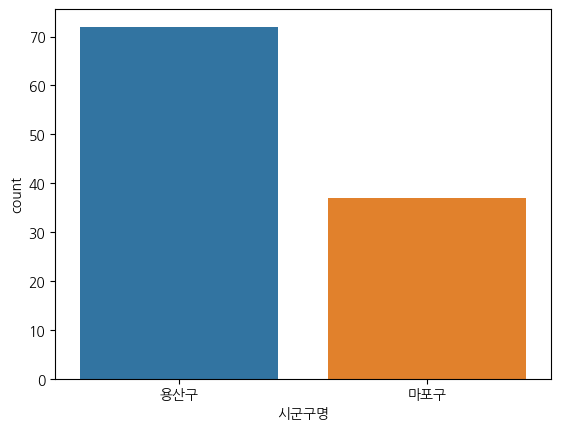

In [66]:
sns.countplot(data=cp, x='시군구명')

<AxesSubplot:xlabel='시설 구분', ylabel='count'>

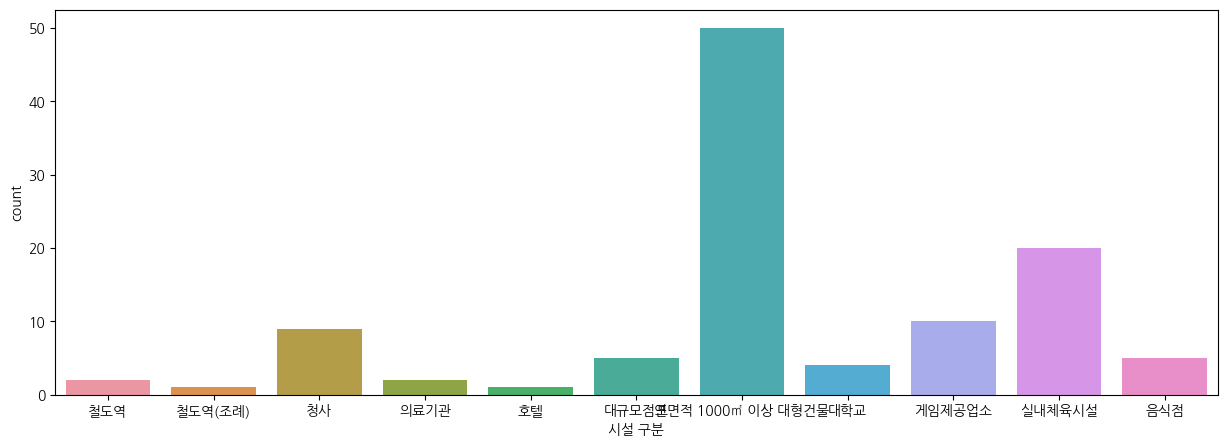

In [72]:
plt.figure(figsize=(15, 5))
sns.countplot(data=cp, x='시설 구분')

<AxesSubplot:xlabel='시설형태', ylabel='count'>

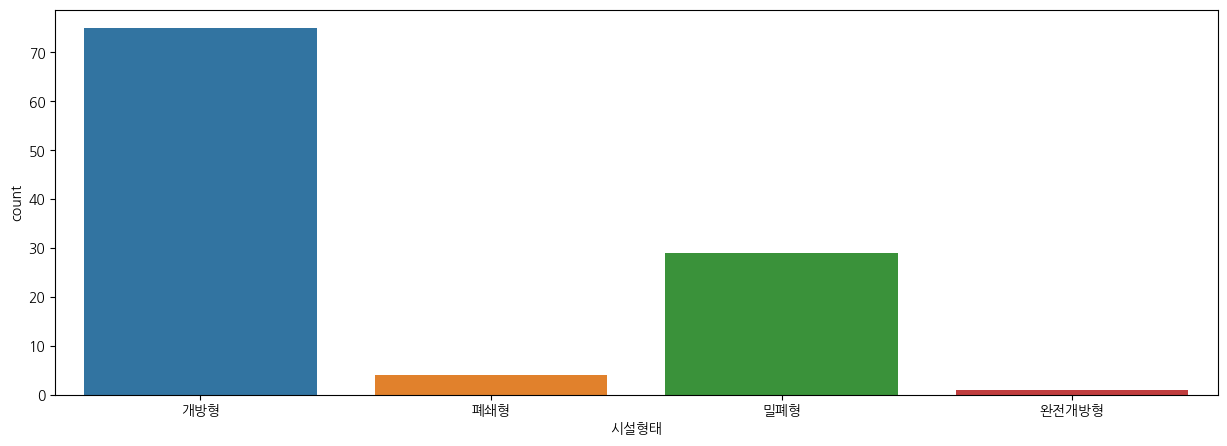

In [95]:
plt.figure(figsize=(15, 5))
sns.countplot(data=cp, x='시설형태')